# Flower Detector

In [41]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn

import cv2
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [42]:
pwd

'C:\\Users\\Malith\\AI\\Practise\\DL_assignment'

In [43]:
my_data= 'C:\\Users\\Praneeth\\AI\\Practise\\DL_assignment\\flowers'
my_data

'C:\\Users\\Malith\\AI\\Practise\\DL_assignment\\flowers'

In [44]:
os.listdir(my_data)

['daisy', 'dandelion', 'rose', 'sunflower', 'test', 'train', 'tulip']

In [45]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'
FLOWER_ROSE_DIR

'C:\\Users\\Malith\\AI\\Practise\\DL_assignment\\flowers/rose/'

In [46]:
data_folder = 'C:\\Users\\Praneeth\\AI\\Practise\\DL_assignment/flowers'

import os
import shutil

train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

train_folder

In [47]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [48]:
for flower_class in classes:

    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)
    # create folders 
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

## Randomly add images to train folders

In [49]:
import random

split_ratio = 0.8  # Train için %80, Test için %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)

    split_index = int(len(flower_images) * split_ratio)

    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)


In [50]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [70]:
import os
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

data_dir = 'C:\\Users\\Praneeth\\AI\\Practise\\DL_assignment/flowers'

total_counts = []
total = 0
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)
    total += num_images
    print(class_dir)
    print('num of Imgs =', num_images)
    
print('TOTAL = ',total)
total_counts

C:\Users\Malith\AI\Practise\DL_assignment/flowers\daisy
num of Imgs = 764
C:\Users\Malith\AI\Practise\DL_assignment/flowers\dandelion
num of Imgs = 1052
C:\Users\Malith\AI\Practise\DL_assignment/flowers\rose
num of Imgs = 784
C:\Users\Malith\AI\Practise\DL_assignment/flowers\sunflower
num of Imgs = 733
C:\Users\Malith\AI\Practise\DL_assignment/flowers\tulip
num of Imgs = 984
TOTAL =  4317


[764, 1052, 784, 733, 984]

In [ ]:
import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            print(d1, d2, colors, class_name)
            x.append(d1)
            y.append(d2)
            hue.append(class_name)


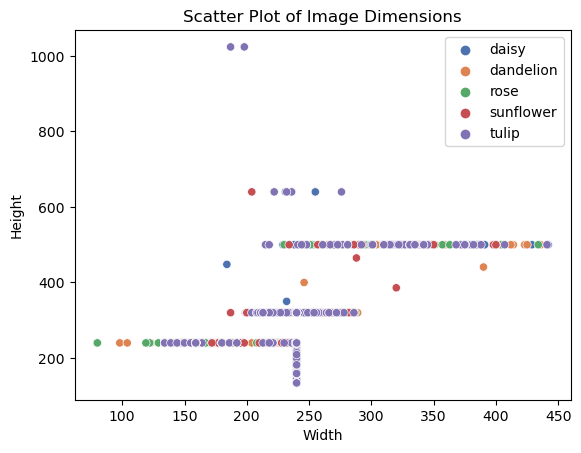

In [53]:
sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [54]:
print(np.mean(x), np.mean(y))

253.03647342995168 338.2268115942029


In [55]:
path1=train_path+'/daisy'+"/1342002397_9503c97b49.jpg"
path1

'C:\\Users\\Malith\\AI\\Practise\\DL_assignment\\flowers/train//daisy/1342002397_9503c97b49.jpg'

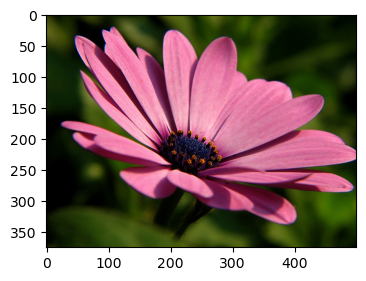

In [56]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [57]:
path2=train_path+'/daisy'+"/5547758_eea9edfd54_n.jpg"
path2

'C:\\Users\\Malith\\AI\\Practise\\DL_assignment\\flowers/train//daisy/5547758_eea9edfd54_n.jpg'

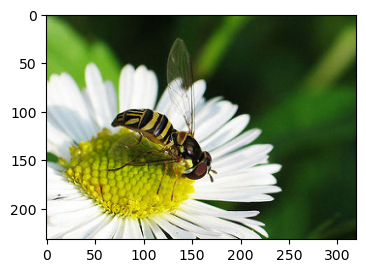

In [58]:
s_flower_img=imread(path2)
plt.figure(figsize=(4,5))
plt.imshow(s_flower_img);

In [59]:
s_img = imread(path2)

s_d1, s_d2, s_colors = s_img.shape
print(s_d1, s_d2, s_colors)

232 320 3


In [60]:
flower_img.max(), flower_img.min()

(255, 0)

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
flower_gen

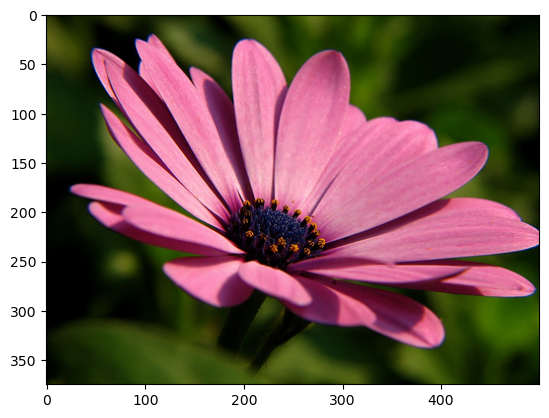

In [62]:
plt.imshow(flower_img)

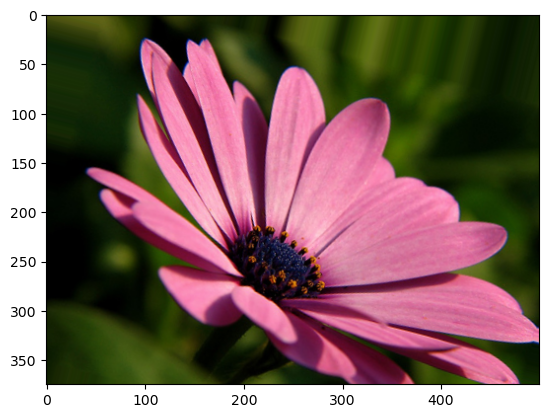

In [63]:
plt.imshow(flower_gen.random_transform(flower_img))

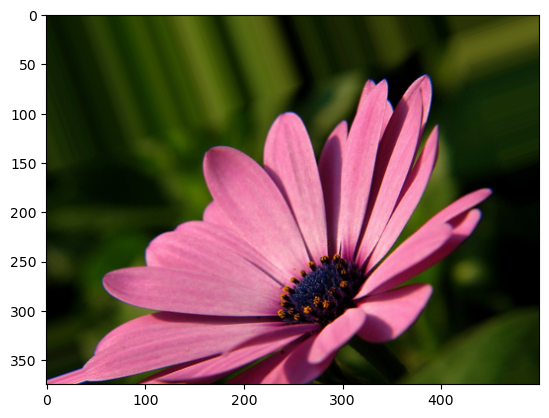

In [65]:
plt.imshow(flower_gen.random_transform(flower_img))

# Create The Model 